<a href="https://colab.research.google.com/github/felicitymueni/Felicity-musau-Independent-project/blob/main/HYPOTHESIS_TESTING_REVISIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHESIS TESTING

## a)PROBLEM STATEMENT

Determine the claim about the blue cars from the autilob dataset records.

Null hypothesis: the average number of blue cars taken equal to that of the blue cars returned

Alternative hypothesis: the average number of blue cars taken is different that of the blue cars returned.

# b)Metric of success definition

To investigate if the alternative hypothesis is true.


# c) Understanding the context

 We will work to investigate the alternative hypothesis of the blue cars of the Autolib electric car-sharing service company provided in the Autolib dataset.
 
  Also identify  areas  of interest through sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim made.

# d) Recording the Experimental Design
Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

providing insights on how you can make improvements through challenges and defining the research question

# e) Relevance of the data
Dataset that was used for analysis  was obtained from an open datasource.

It was a daily aggregation, by date and postal code, of the number of events on the Autolib network (recharching and car-sharing). 

Also the data is relevant for the analysis since it was  used was ranging from january to july of 2018.

# EXPLORATION OF DATA

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [14]:
# reading the data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
#loading the data in the colab
df =  pd.read_csv("autolib_daily_events_postal_code.csv")


In [ ]:
#Loading the last five records of the data
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#loading the first five records of the data
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Describing the data in terms of mean,median and mode
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [17]:
#Checking for number of records in the dataset
df.shape

(16085, 13)

In [18]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [19]:
#Checking for null values
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [22]:
df.isnull().sum().sort_values(ascending=False)

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [21]:
#checking for unique values
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

# EXPLANATORY ANALYSIS

In [23]:
# Rename columns
col_names = df.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

df.columns = col_names
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [24]:
df.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,0,weekday,110,103
1,75001,1,weekday,98,94
2,75001,2,weekday,138,139
3,75001,3,weekday,104,104
4,75001,4,weekday,114,117
...,...,...,...,...,...
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35
16083,95880,0,weekday,11,14


In [25]:
df.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
12890,93800,5,weekend,16,17
8471,92370,2,weekday,20,18
10370,93130,3,weekday,15,16
5596,92160,6,weekend,47,37
1994,75013,6,weekend,613,614
3323,75116,5,weekend,18,17
7381,92300,3,weekday,102,101
15286,94500,4,weekday,35,31
15417,94700,3,weekday,36,30
2498,75017,2,weekday,638,616


In [26]:
# Extract day type data
df2 = df[df.day_type == 'weekend']

In [27]:
df2.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
15821,95870,6,weekend,38,35
2153,75014,6,weekend,422,381
15832,95870,6,weekend,9,11
7356,92300,6,weekend,161,170
13081,94000,5,weekend,141,133
9429,92500,5,weekend,148,146
8018,92340,5,weekend,18,18
8201,92350,6,weekend,22,25
12703,93700,6,weekend,87,93
426,75003,5,weekend,333,339


      I choose to work with weekends since only one data  is required.




# UNIVARIATE ANALYSIS

In [28]:
# get proprotion of day of week
df2['dayofweek'].value_counts(normalize=True)*100

6    50.077076
5    49.922924
Name: dayofweek, dtype: float64

From the dataset, the days of the week are coded with 5 being saturday and 6 being sunday

In [29]:
# Describe numerical variables
df2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,4541.000000,4541.000000
mean,151.090068,152.029289
std,218.565642,221.140337
min,0.000000,0.000000
25%,25.000000,24.000000
50%,59.000000,58.000000
75%,156.000000,157.000000
max,1352.000000,1332.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

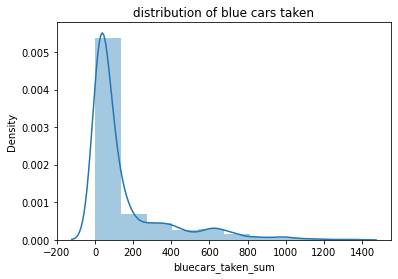

In [30]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

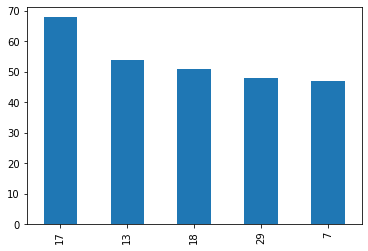

In [ ]:
df2['bluecars_returned_sum'].value_counts().head().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

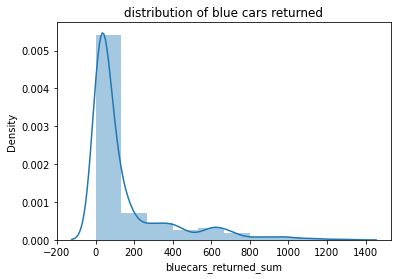

In [31]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

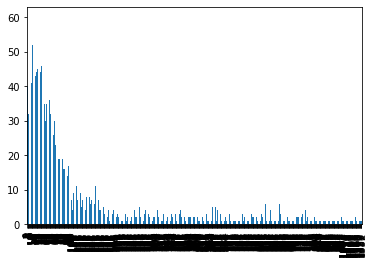

In [32]:
df2['bluecars_taken_sum'].value_counts().sort_index().plot.bar()

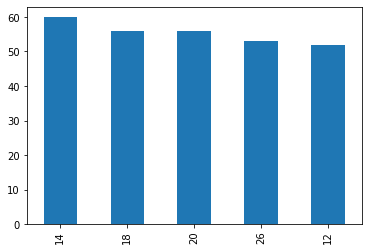

In [33]:
df2['bluecars_taken_sum'].value_counts().head().plot.bar()

In [34]:
df2['postal_code'] = df2['postal_code'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# BIVARIATE ANALYSIS

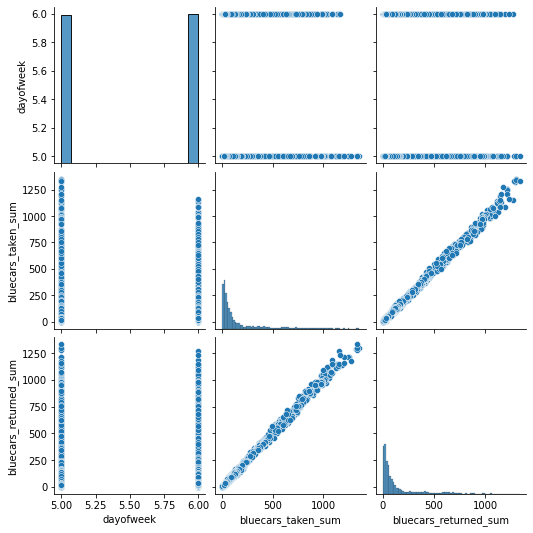

In [35]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

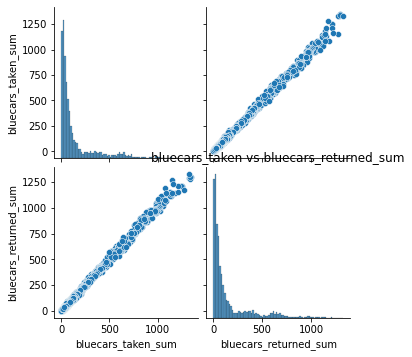

In [36]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

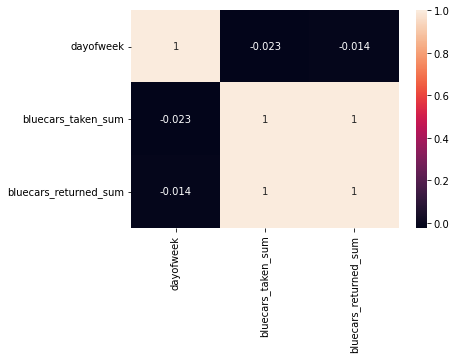

In [37]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

# hypothesis testing
1.   H0: There is no difference in Number of bluecars taken in area of postal code 75001 and 95880 on weekends.
2.   H1: Number of bluecars taken in area of postal code 75001 is Not equal to 95880 on weekends.
3.   Singnificance level = 0.05
4.   Since the sample is more than 30,Z-test is used

# Conclusion
we will reject the null hypothesis and accepct the alternate hypothesis.








In [ ]:
weekend=df[df['day_type'] =='weekend']
weekend.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39


In [ ]:
df1 = weekend[weekend['Postal code'] == 75001]
df2 = weekend[weekend['Postal code'] == 95880]
df2.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
15934,95880,1/6/2018,1437,5,weekend,19,22,0,0,0,0,0,0
15935,95880,1/7/2018,1440,6,weekend,28,17,0,0,7,7,0,0
15941,95880,1/13/2018,1440,5,weekend,25,26,0,0,3,3,0,0
15942,95880,1/14/2018,1440,6,weekend,39,31,0,0,0,0,0,0
15948,95880,1/20/2018,1439,5,weekend,25,20,0,0,0,1,0,0


In [ ]:
#finding the population mean of total bluecars taken
m_data = np.mean(df2['BlueCars_taken_sum'])
m_data

28.022727272727273

In [ ]:
ztest, pval = stests.ztest(df1['BlueCars_taken_sum'], value=m_data)
print(float(pval))

1.1206342178969125e-144


In [ ]:
if pval < 0.05:
  print("reject the null hypothesis")
else:
  print("Accept the null hypothesis")

reject the null hypothesis
